In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data source: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

Description:
1. Sample code number:            id number
2. Clump Thickness:               1 - 10
3. Uniformity of Cell Size:       1 - 10
4. Uniformity of Cell Shape:      1 - 10
5. Marginal Adhesion:             1 - 10
6. Single Epithelial Cell Size:   1 - 10
7. Bare Nuclei:                   1 - 10
8. Bland Chromatin:               1 - 10
9. Normal Nucleoli:               1 - 10
10. Mitoses:                       1 - 10
11. Class:                        (2 for benign, 4 for malignant)

In [2]:
file_path = '/content/breast-cancer-wisconsin.data'

In [3]:
dataset= pd.read_csv(file_path)

In [4]:
dataset.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [5]:
dataset_columns=['id', 'Clump_Thickness',
'Uniformity-Cell-Size', 'Uniformity-cell-shape','Marginal Adhension',
'Single-Epithlial-Cell-Size','Bare_Nuclei','Bland_Chromatin','Normal_Nuclei','Mitoses', 'Class']
dataset.columns= dataset_columns


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          698 non-null    int64 
 1   Clump_Thickness             698 non-null    int64 
 2   Uniformity-Cell-Size        698 non-null    int64 
 3   Uniformity-cell-shape       698 non-null    int64 
 4   Marginal Adhension          698 non-null    int64 
 5   Single-Epithlial-Cell-Size  698 non-null    int64 
 6   Bare_Nuclei                 698 non-null    object
 7   Bland_Chromatin             698 non-null    int64 
 8   Normal_Nuclei               698 non-null    int64 
 9   Mitoses                     698 non-null    int64 
 10  Class                       698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [7]:
dataset['Bare_Nuclei'].replace('?',-99999, inplace= True)
dataset1= dataset.apply(pd.to_numeric)
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   id                          698 non-null    int64
 1   Clump_Thickness             698 non-null    int64
 2   Uniformity-Cell-Size        698 non-null    int64
 3   Uniformity-cell-shape       698 non-null    int64
 4   Marginal Adhension          698 non-null    int64
 5   Single-Epithlial-Cell-Size  698 non-null    int64
 6   Bare_Nuclei                 698 non-null    int64
 7   Bland_Chromatin             698 non-null    int64
 8   Normal_Nuclei               698 non-null    int64
 9   Mitoses                     698 non-null    int64
 10  Class                       698 non-null    int64
dtypes: int64(11)
memory usage: 60.1 KB


In [8]:
missing_values= dataset1.isnull().sum()
print(missing_values)

id                            0
Clump_Thickness               0
Uniformity-Cell-Size          0
Uniformity-cell-shape         0
Marginal Adhension            0
Single-Epithlial-Cell-Size    0
Bare_Nuclei                   0
Bland_Chromatin               0
Normal_Nuclei                 0
Mitoses                       0
Class                         0
dtype: int64


In [9]:
dataset2= dataset1.drop(['id'],axis=1)
dataset2

,Clump_Thickness,Uniformity-Cell-Size,Uniformity-cell-shape,Marginal Adhension,Single-Epithlial-Cell-Size,Bare_Nuclei,Bland_Chromatin,Normal_Nuclei,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2
694,2,1,1,1,2,1,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


In [10]:
x = dataset2.drop(['Class'],axis=1)
print(x)
y= dataset2['Class']
print(y)

     Clump_Thickness  Uniformity-Cell-Size  Uniformity-cell-shape  \
0                  5                     4                      4   
1                  3                     1                      1   
2                  6                     8                      8   
3                  4                     1                      1   
4                  8                    10                     10   
..               ...                   ...                    ...   
693                3                     1                      1   
694                2                     1                      1   
695                5                    10                     10   
696                4                     8                      6   
697                4                     8                      8   

     Marginal Adhension  Single-Epithlial-Cell-Size  Bare_Nuclei  \
0                     5                           7           10   
1                     1            

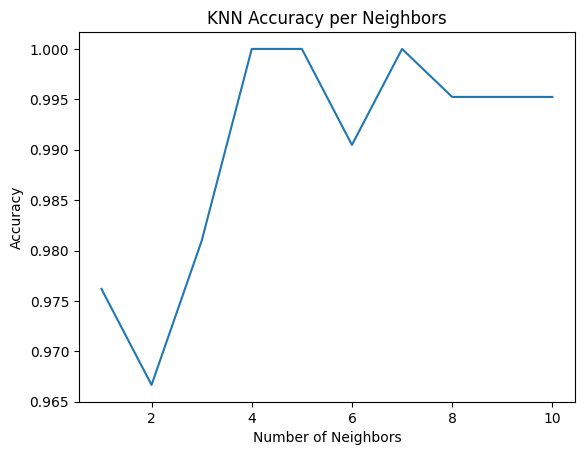

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y,test_size=.3, random_state=25)
from sklearn import neighbors,preprocessing
accuracy_list= []
number_of_neighbors= []
for i in range(1,11):
  clf= neighbors.KNeighborsClassifier(n_neighbors=i,
  weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski',
  metric_params=None, n_jobs=None)
  clf.fit(X_train,Y_train)
  accuracy = clf.score(X_test, Y_test)
  accuracy_list.append(accuracy)
  number_of_neighbors.append(i)

plt.plot(number_of_neighbors,accuracy_list)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy per Neighbors')
plt.show()




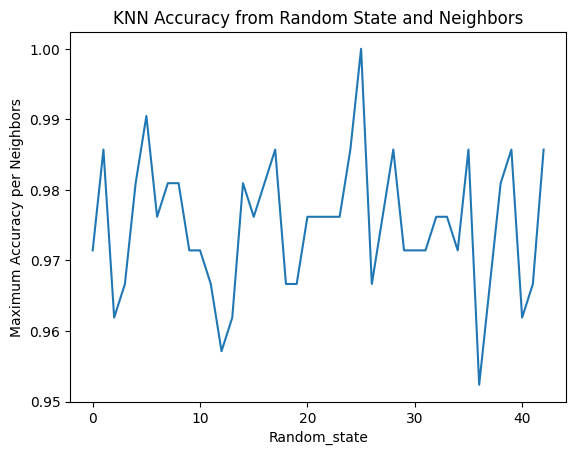

In [12]:
random_state_list = []
maximum_acc_list = []
for z in range(0, 43):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.3, random_state=z)
    from sklearn import neighbors, preprocessing
    accuracy_list = []
    number_of_neighbors = []
    random_state_list.append(z)
    for i in range(1, 11):
        clf = neighbors.KNeighborsClassifier(n_neighbors=i,
                                            weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski',
                                            metric_params=None, n_jobs=None)
        clf.fit(X_train, Y_train)
        accuracy = clf.score(X_test, Y_test)
        accuracy_list.append(accuracy)
        number_of_neighbors.append(i)
    # Take the maximum value from accuracy_list and append it to maximum_acc_list
    maximum_acc_list.append(max(accuracy_list))
plt.plot(random_state_list, maximum_acc_list)
plt.xlabel('Random_state')
plt.ylabel('Maximum Accuracy per Neighbors')
plt.title('KNN Accuracy from Random State and Neighbors')
plt.show()





In [ ]:
for z in range(0,43):
  X_train, X_test, Y_train, Y_test= train_test_split(x,y,test_size=.3, random_state=z)
  from sklearn import neighbors,preprocessing
  accuracy_list= []
  number_of_neighbors= []
  for i in range(1,11):
    clf= neighbors.KNeighborsClassifier(n_neighbors=i,
                    weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski',
                     metric_params=None, n_jobs=None)
    clf.fit(X_train,Y_train)
    accuracy = clf.score(X_test, Y_test)
    accuracy_list.append(accuracy)
    number_of_neighbors.append(i)
    print(f'The max accuracy is {max(accuracy_list)} when (z,i)= {z,i}')

The max accuracy is 0.9523809523809523 when (z,i)= (0, 1)
The max accuracy is 0.9523809523809523 when (z,i)= (0, 2)
The max accuracy is 0.9714285714285714 when (z,i)= (0, 3)
The max accuracy is 0.9714285714285714 when (z,i)= (0, 4)
The max accuracy is 0.9714285714285714 when (z,i)= (0, 5)
The max accuracy is 0.9714285714285714 when (z,i)= (0, 6)
The max accuracy is 0.9714285714285714 when (z,i)= (0, 7)
The max accuracy is 0.9714285714285714 when (z,i)= (0, 8)
The max accuracy is 0.9714285714285714 when (z,i)= (0, 9)
The max accuracy is 0.9714285714285714 when (z,i)= (0, 10)
The max accuracy is 0.9714285714285714 when (z,i)= (1, 1)
The max accuracy is 0.9714285714285714 when (z,i)= (1, 2)
The max accuracy is 0.9857142857142858 when (z,i)= (1, 3)
The max accuracy is 0.9857142857142858 when (z,i)= (1, 4)
The max accuracy is 0.9857142857142858 when (z,i)= (1, 5)
The max accuracy is 0.9857142857142858 when (z,i)= (1, 6)
The max accuracy is 0.9857142857142858 when (z,i)= (1, 7)
The max accur

Note: when z= 25 and when i= {4<=x<=10} is the most optimal, set up

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y,test_size=.3, random_state=25)
clf= neighbors.KNeighborsClassifier(n_neighbors=4,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski',
  metric_params=None, n_jobs=None)
clf.fit(X_train,Y_train)
accuracy = clf.score(X_test, Y_test)
print(accuracy)
lst= []
prediction_List =[]
i=0
x2= input("Do you want to make a prediction: Y or N:   ")
while(x2== 'Y') and (i<=9):
    x1= int(input("Enter a number between 1-10 : "))
    if(x1>10):
      print("Please put a number between 1-10")
    elif (x1<1):
     print("No values less than 1")
    elif(x1== ""):
      print("No string values allowed")
    elif(x1 is None):
      print("Must enter some values 1-10 that's not null")
    else:
      prediction_List.insert(i,x1)
      i=i+1
      print(prediction_List)
    if(i==9):
        lst.append(prediction_List)
        print('\n')
        print(lst)
        prediction_List= []
        x3= input("Do you want to make another prediction: Y or N:  ")
        if(x3== 'Y'):
         i=0
        else:
          break
          print("Ended your prediction list")

lst= np.array(lst)
lst = lst.reshape(-1, 9)
for z in range(0, len(lst)):
 prediction = clf.predict(lst)
 print(f'prediction is {prediction} for {[lst[z]]}')
 print()
 if( z== len(lst)):
   break






